# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_rows', 30)

# Load Kaggle Titanic Data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Column info

survival = 0 : no , 1: yes

pclass (ticket class) = 1:1st, 2:2nd, 3:3rd

sibsp = # siblings/spouses

parch = # parents/children

embarked = C = Cherbourg, Q = Queenstown, S = Southampton


# Helper Functions

In [3]:
def rescale(s):
    mean = s.mean()
    std = s.std()
    normal = (s - mean)/(std)
    return normal

def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

# Table view

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Clean up

## Data exploration

In [5]:
print(train_data.info())
print("")
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pc

In [11]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", "{:.3f}".format(rate_women))

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", "{:.3f}".format(rate_men))

% of women who survived: 0.742
% of men who survived: 0.189


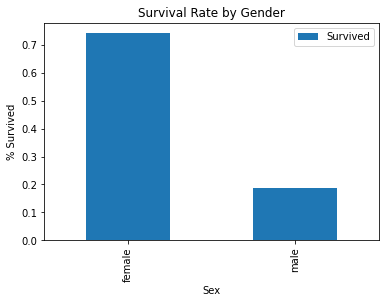

In [18]:
sex_pivot = train_data.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar(title = 'Survival Rate by Gender', ylabel = '% Survived')
plt.show()

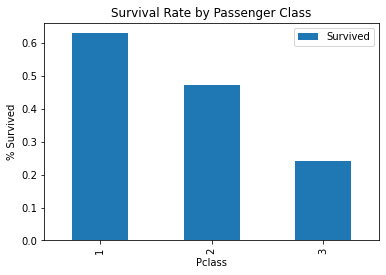

In [19]:
class_pivot = train_data.pivot_table(index="Pclass",values="Survived")
class_pivot.plot.bar(title = 'Survival Rate by Passenger Class', ylabel = '% Survived')
plt.show()

In [47]:
train_data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

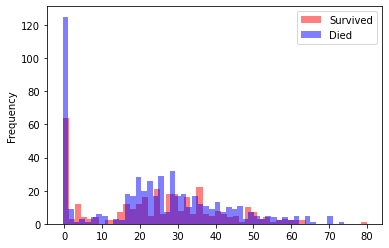

In [22]:
survived = train_data[train_data["Survived"] == 1]
died = train_data[train_data["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

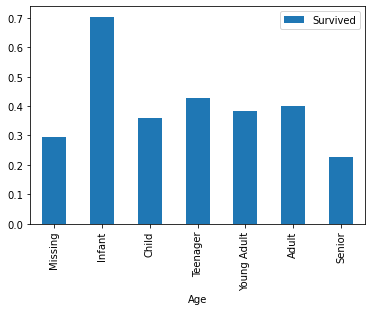

In [20]:
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
train = process_age(train_data,cut_points,label_names)
test = process_age(test_data,cut_points,label_names)

pivot = train_data.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar(xlabel = 'Age')
plt.show()

In [23]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [60]:
for column in ["Pclass","Sex","Age_categories"]:
    train = create_dummies(train,column)
    test = create_dummies(test,column)

# Logistic Regression

In [52]:
lr = LogisticRegression()
columns = ['Pclass_2', 'Pclass_3', 'Sex_male']
lr.fit(train[columns], train['Survived'])

LogisticRegression()

In [53]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
      'Age_categories_Senior']

lr = LogisticRegression()
lr.fit(train[columns], train["Survived"])

LogisticRegression()

In [54]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [55]:
holdout = test

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.20,random_state=0)

In [56]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)

print(accuracy)

0.8100558659217877


## Cross validation score

In [57]:
lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.76404494 0.76404494 0.76404494 0.78651685 0.8        0.80898876
 0.80898876 0.82022472 0.83146067 0.87640449]
0.8024719101123596


## Making prediction

In [58]:
lr = LogisticRegression()
lr.fit(all_X,all_y)
holdout_predictions = lr.predict(holdout[columns])

## Submission File

In [59]:
holdout_ids = holdout["PassengerId"]
sublesson_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
sublesson = pd.DataFrame(sublesson_df)

sublesson.to_csv("sublesson.csv",index=False)

# Random Forest Classifier

In [38]:
y = train["Survived"]
X = train[columns]

model = RFC(n_estimators=100, max_depth=5, random_state=1)
model.fit(all_X,all_y)
predictions = model.predict(holdout[columns])

output = pd.DataFrame({'PassengerId': holdout.PassengerId, 'Survived': predictions})

output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [37]:
model = RFC(n_estimators=100, max_depth=5, random_state=1)
model.fit(train_X, train_y)
predictions = model.predict(test_X)
accuracy = accuracy_score(test_y, predictions)

print(accuracy)

0.8268156424581006


In [36]:
model = RFC(n_estimators=100, max_depth=5, random_state=1)
scores = cross_val_score(model, all_X, all_y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.76404494 0.7752809  0.78651685 0.78651685 0.79775281 0.8
 0.82022472 0.83146067 0.83146067 0.88764045]
0.8080898876404493
